In [1]:
import pandas as pd
import numpy as np

Exploration

In [26]:
airbnb = pd.read_csv('airbnb_train.csv')
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [4]:
airbnb.info() # Donne des informations sur les colonnes et les types de données


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [6]:
airbnb.describe() # Donne des statistiques descriptives pour les colonnes numériques

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.223400e+04,22234.000000,22234.000000,22183.000000,22234.000000,22234.000000,22234.000000,17256.000000,22208.000000,22199.000000
mean,1.122269e+07,4.783481,3.155573,1.236037,38.462971,-92.269305,20.670774,94.069077,1.264769,1.711473
std,6.080480e+06,0.718758,2.143870,0.586246,3.071679,21.670081,37.183731,7.782235,0.852819,1.254903
min,3.362000e+03,2.302585,1.000000,0.000000,33.339002,-122.510940,0.000000,20.000000,0.000000,0.000000
25%,6.202924e+06,4.317488,2.000000,1.000000,34.136082,-118.340633,1.000000,92.000000,1.000000,1.000000
50%,1.217425e+07,4.700480,2.000000,1.000000,40.662632,-76.994944,6.000000,96.000000,1.000000,1.000000
75%,1.639502e+07,5.220356,4.000000,1.000000,40.746358,-73.954599,23.000000,100.000000,1.000000,2.000000
max,2.120450e+07,7.600402,16.000000,8.000000,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000


In [30]:
class CustomTransformation():

    def init(self):
        """
        Class simple pour convertir les type de propriétés en des indices numériques, utilisable pour un algo de machine learning
        """

        self.fitted = False # Indique si fit_transform a été utilisé, pour éviter d’utiliser transform sans que fit ai été appelé
        self.property2index = dict() # Dictionnaire qui va convertir le nom en indice
        self.max_index = 0 # Indique le dernier indice de la propriété.

    def fit_transform(self, dataset, colonne):

        self.fitted = True

        # Récupère les types de propriété (maison, appart etc...)
        properties = dataset[colonne].unique()
        print("Tous les types de propriétés : ", properties)

        self.property2index = {prop:i for (i, prop) in enumerate(properties)}
        self.max_index = max(list(self.property2index.values()))

        # transform
        return self.transform(dataset, colonne)

    def transform(self, dataset, colonne):
        # Transform les propriétés en indice
        dataset.loc[:, colonne] = dataset[colonne].replace(self.property2index)


        # Ligne un peu moche qui fait en sorte de remplacer les lignes qui ont des nom de logement qui n’était pas dans l’entrainement
        dataset.loc[dataset[colonne].map(type).eq(str), colonne] = np.nan

        # remplace les valeurs null
        dataset[dataset.bathrooms.isna()] = 0
        dataset[dataset.accommodates.isna()] = 0
        dataset[dataset.property_type.isna()] = self.max_index + 1
        return dataset

In [31]:
features_transformer = CustomTransformation()

airbnb.head()
airbnb_train = features_transformer.fit_transform(airbnb)
airbnb_train.head()

Tous les types de propriétés :  [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30]
Toute les types de chambres :  ['Private room' 'Entire home/apt' 'Shared room' 0]


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,0,0,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,1,1,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


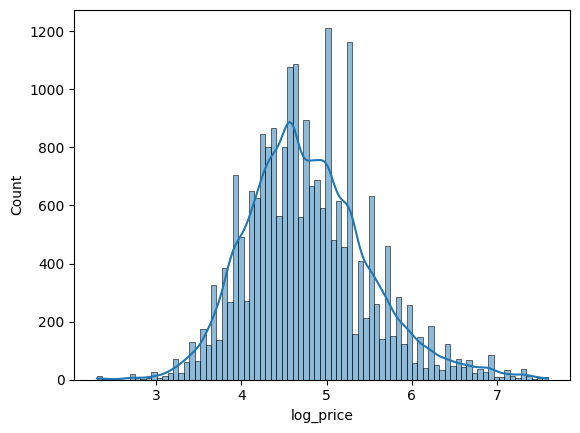

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution des prix
sns.histplot(airbnb['log_price'], kde=True)
plt.show()

In [23]:
airbnb.iloc[:, 11:19].head()

,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review
0,Large bright airy room with 2 balconies and Ja...,NaN,t,f,NaN,2015-12-12,t,NaN
1,Private room for rent in a six bedroom apt wit...,2017-05-07,t,t,100%,2016-11-04,t,2017-09-17
2,"14th st corridor 2br/2ba condo, secure boutiqu...",NaN,t,f,NaN,2016-12-11,t,NaN
3,My place is close to Manhattan. You can see th...,2016-10-07,t,t,100%,2012-08-04,f,2017-09-29
4,This beautiful home can be your dream destinat...,2016-09-25,t,t,100%,2013-07-25,f,2017-08-28


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=airbnb
# Standardisation des données
scaler = StandardScaler()
Z = scaler.fit_transform(X)

# créer le model de la PCA 
pca = PCA(n_components=17)

# appliquer la PCA à la base de donnée
pca.fit(Z)

# ou bien appliquer la PCA et la projeter 
x_pca = pca.fit_transform(Z)

# Obtenir les composantes principales
Composante_principale = pca.components_

print(Composante_principale)
# Obtenir les variances expliquées 
Variance_explique = pca.explained_variance_
print(Variance_explique)

# Obtenir les proportions des variances expliquées 

proportion_varExpliquée = pca.explained_variance_ratio_
print(proportion_varExpliquée)



ValueError: could not convert string to float: '{TV,"Wireless Internet",Kitchen,"Free parking on premises","Pets allowed","Suitable for events",Washer,Dryer,"Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron}'

In [83]:
def convert_to_strings(collection):
    if isinstance(collection, (set, list, tuple)):
        return {str(item) for item in collection}
    else:
        raise TypeError("Tous les éléments de la colonne 'amenities' doivent être des collections (set, list, tuple).")


airbnb["amenities"] = airbnb["amenities"].apply(convert_to_strings)




element_length=[]
for element in airbnb["amenities"].unique():
    length = len(element)
    element_length.append(length)

print(element_length)


TypeError: Tous les éléments de la colonne 'amenities' doivent être des collections (set, list, tuple).